# Covid-19 CDC Data Analysis

## 1- Abstract
This report presents an exploratory data analysis performed on data of some COVID-19 patients in the United States. The data was obtained from the Center for Disease Control and Prevention CDC. The goal of our analysis is to demonstrate the relationships between the patients' mortality rate and the following factors: age, race & ethnicity, sex, having medical conditions, patient hospitalization, and patient admission to the intensive care unit ICU. In order to exclude the effects of the newly innovated vaccines and the new strains of SARS-CoV-2, this report uses only the confirmed cases of the data that have been captured during the period [01/01/2020, 02/12/2020]. The report concludes that all the mentioned factors have significant effects on the patients' mortality rate.

## 2- Introduction
The Center for Disease Control and Prevention CDC shares important parts of a database called "COVID-19 case surveillance" with public. The part that will be used in this report is called __COVID-19 Case Surveillance Public Use Data__. 
The mentioned part contains 11 data elements (i.e. columns or features). 
The database is updated monthly, the 11 data elements of our data are:

|Column Name |Description |Type
|-----|-----|----- 
|cdc_report_dt |Date case was first reported to the CDC. Calculated date. This date was populated using the date at which a case record was first submitted to the database. If missing, then the report date entered on the case report form was used. If missing, then the date at which the case first appeared in the database was used. If none available, then left blank. |Date & Time
|pos_spec_dt|Date of first positive specimen collection (Case Report Form)|Date & Time
|onset_dt|Symptom onset date, if symptomatic (Case Report Form)|Date & Time
|current_status|Case Status (Case Report Form: What is the current status of this person?) -- Values: Laboratory-confirmed case; Probable case;|Plain Text
|sex|Sex (Case Report Form): Male; Female; Unknown; Other; Missing; NA|Plain Text
|age_group|Age Group: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79 Years; 80 + Years;Unknown, Missing; NA; The age group categorizations were populated using the age value that was reported on the case report form. Date of birth was used to fill in missing/unknown age values using the difference in time between date of birth and onset date.|Plain Text
|race_ethnicity_combined |Race and ethnicity (combined): American Indian/Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Multiple/Other, Non-Hispanic; Native Hawaiian/Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Hispanic/Latino; Unknown; Missing; NA. If more than race was reported, race was categorized into multiple/other races.|Plain Text
|hosp_yn|Hospitalization status (Case Report Form: Was the patient hospitalized?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|icu_yn|ICU admission status (Case Report Form: Was the patient admitted to an intensive care unit (ICU)?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|death_yn|Death status (Case Report Form: Did the patient die as a result of this illness?) -- Values: Yes; No; Unknown; Missing;|Plain Text
|medcond_yn|Presence of underlying comorbidity or disease (Case Report Form: Pre-existing medical conditions?) -- Values: Yes; No; Unknown; Missing;|Plain Text

For more details about the data kindly refer to [COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf).

The goal of this report is, __for the confirmed cases__, to demonstrate the relationships between the "non-datetime" data elements of the data set and the __death_yn__ data element. 
As mentioned before, in order to avoid the effects of the invented vaccines and the new strains of SARS-CoV-2 on the relationships that are being studied, this report does not take into account the whole available data in  __COVID-19 Case Surveillance Public Use Data__ data set, but considers only the data of the period __[01/01/2020, 02/12/2020 ]__. 

The remaining sections of this report are organized as follows:
The third section explains importing the data, the fourth section explains the data cleaning process, the fifth section contains the univariate analysis, the sixth section demonstrates the multivariate analysis, the seventh section tests some proposed hypotheses, the 8th section discusses the limitations of the data and the analysis, and the last section summarizes the results and talks about the future works.


## 3- Importing The Data
Firstly, the data have been downloaded from CDC in csv format, and after that the data have been imported into our python environment.

P.S. As CDC updates the data monthly, we have to metion that the last update of the downloaded data was on __December 2, 2020__. Also we have to mention that the downloaded data contains about 8.4M rows and only 11 columns.

importing the data:

In [128]:
import pandas as pd
df=pd.read_csv('C:/Users/vs/Documents/COVID-19_Case_Surveillance_Public_Use_Data.csv')

c:\users\vs\miniconda3\envs\d2l\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [129]:
df.shape

(8405079, 11)

In [130]:
print(df.info( show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  8405079 non-null  object
 1   pos_spec_dt                    2870789 non-null  object
 2   onset_dt                       4395957 non-null  object
 3   current_status                 8405079 non-null  object
 4   sex                            8405061 non-null  object
 5   age_group                      8404990 non-null  object
 6   Race and ethnicity (combined)  8405072 non-null  object
 7   hosp_yn                        8405079 non-null  object
 8   icu_yn                         8405079 non-null  object
 9   death_yn                       8405079 non-null  object
 10  medcond_yn                     8405079 non-null  object
dtypes: object(11)
memory usage: 705.4+ MB
None


In [131]:
#number of unique values in each column
df.nunique()

cdc_report_dt                    321
pos_spec_dt                      313
onset_dt                         338
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

In [132]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


## 4- Data Cleaning
First of all, we have to keep only the labrotory confirmed cases, and delete all the other cases:

In [133]:
#ignore all the rows that do not contain "Laboratory-confirmed case" value in the column "current_status"
df=df.loc[df['current_status'] == 'Laboratory-confirmed case']
print(df.info( show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910118 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  7910118 non-null  object
 1   pos_spec_dt                    2704693 non-null  object
 2   onset_dt                       4194612 non-null  object
 3   current_status                 7910118 non-null  object
 4   sex                            7910101 non-null  object
 5   age_group                      7910037 non-null  object
 6   Race and ethnicity (combined)  7910111 non-null  object
 7   hosp_yn                        7910118 non-null  object
 8   icu_yn                         7910118 non-null  object
 9   death_yn                       7910118 non-null  object
 10  medcond_yn                     7910118 non-null  object
dtypes: object(11)
memory usage: 724.2+ MB
None


From the results above, we can see that we have alot of confirmed cases without a first positive specimen date. Such a data could be inaccurate,
so let us ignore this data

In [134]:
#ignore all the rows that contain a null value in the column "pos_spec_dt"
df = df[df['pos_spec_dt'].notna()]
print(df.info( show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704693 entries, 0 to 7494730
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  2704693 non-null  object
 1   pos_spec_dt                    2704693 non-null  object
 2   onset_dt                       1359098 non-null  object
 3   current_status                 2704693 non-null  object
 4   sex                            2704683 non-null  object
 5   age_group                      2704639 non-null  object
 6   Race and ethnicity (combined)  2704687 non-null  object
 7   hosp_yn                        2704693 non-null  object
 8   icu_yn                         2704693 non-null  object
 9   death_yn                       2704693 non-null  object
 10  medcond_yn                     2704693 non-null  object
dtypes: object(11)
memory usage: 247.6+ MB
None


Now our data look better, but we still need to ignore all the date columns, and the current_status column as we are not concerned about them anymore:

In [135]:
#drop the first four columns.
df.drop(df.columns[[0, 1, 2, 3]], axis=1, inplace=True)
print(df.info( show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704693 entries, 0 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   sex                            2704683 non-null  object
 1   age_group                      2704639 non-null  object
 2   Race and ethnicity (combined)  2704687 non-null  object
 3   hosp_yn                        2704693 non-null  object
 4   icu_yn                         2704693 non-null  object
 5   death_yn                       2704693 non-null  object
 6   medcond_yn                     2704693 non-null  object
dtypes: object(7)
memory usage: 165.1+ MB
None


From the results above, we can notice that almost all the remaining data cells don't contain null values, so we can remove all the rows that contain null values.

In [136]:
df.dropna(inplace=True)
print(df.info( show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704639 entries, 0 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   sex                            2704639 non-null  object
 1   age_group                      2704639 non-null  object
 2   Race and ethnicity (combined)  2704639 non-null  object
 3   hosp_yn                        2704639 non-null  object
 4   icu_yn                         2704639 non-null  object
 5   death_yn                       2704639 non-null  object
 6   medcond_yn                     2704639 non-null  object
dtypes: object(7)
memory usage: 165.1+ MB
None


From the results above, the data seems to be consistent, but we still have some issues as all the remaining rows still contain values like "Unknown" or "Missing". And as those values might be useless for our purpose, we can delete them.

P.S. Deleting these values may bias our sample, but this report assumes that the cases that are fully recorded, without null, missing or unknown values are more accurate. Moreover, deleting these values simplifies the analysis. Especially when we have such a volume of data that requires huge computational capabilities. 

In [137]:
df=df.loc[df['sex'] != 'Unknown']
df=df.loc[df['sex'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missingvalue in the column "age_group"
df=df.loc[df['age_group'] != 'Unknown']
df=df.loc[df['age_group'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missing" value in the column "Race and ethnicity (combined)"
df=df.loc[df['Race and ethnicity (combined)'] != 'Unknown']
df=df.loc[df['Race and ethnicity (combined)'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missing" value in the column "hosp_yn"
df=df.loc[df['hosp_yn'] != 'Unknown']
df=df.loc[df['hosp_yn'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missing" value in the column "icu_yn"
df=df.loc[df['icu_yn'] != 'Unknown']
df=df.loc[df['icu_yn'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missing" value in the column "death_yn"
df=df.loc[df['death_yn'] != 'Unknown']
df=df.loc[df['death_yn'] != 'Missing']
#ignore all the rows that contian "Unknown" or "Missing" value in the column "medcond_yn"
df=df.loc[df['medcond_yn'] != 'Unknown']
df=df.loc[df['medcond_yn'] != 'Missing']
print(df.info( show_counts=True))
#print number of unique values in each column
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324387 entries, 1 to 7494730
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   sex                            324387 non-null  object
 1   age_group                      324387 non-null  object
 2   Race and ethnicity (combined)  324387 non-null  object
 3   hosp_yn                        324387 non-null  object
 4   icu_yn                         324387 non-null  object
 5   death_yn                       324387 non-null  object
 6   medcond_yn                     324387 non-null  object
dtypes: object(7)
memory usage: 19.8+ MB
None


sex                              3
age_group                        9
Race and ethnicity (combined)    7
hosp_yn                          2
icu_yn                           2
death_yn                         2
medcond_yn                       2
dtype: int64

The remaining data are now clean, and although, the data size has been shrinked from 8.4Mx11 to 324387x7, the data still big enough to help us in our pupose in this report.

## 5- Univariate Analysis
Now each feature of the remaining features (columns) will be analyzed independently. 

### 5.1- sex Feature:

Firstly, let us describe the distribution of the values

In [138]:
df['sex'].value_counts()

Female    171867
Male      152477
Other         43
Name: sex, dtype: int64

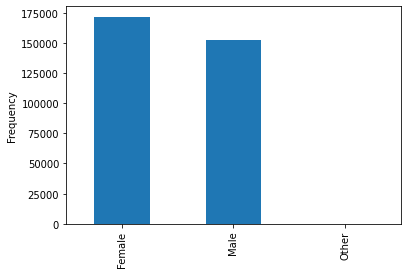

In [139]:
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

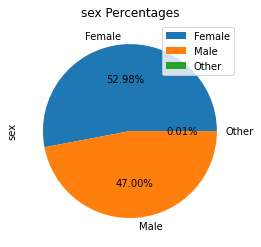

In [140]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('sex Percentages')
plt.legend()
plt.show()

We can see that the sex feature is imbalanced (i.e. there is a considerable difference in the counts of the Females and the Males  in our sample). But this difference can be caused by a sampling error or bias, in addition to that we have to know that male/female ratio in USA is 0.96 [wikipedia](https://en.wikipedia.org/wiki/Demographics_of_the_United_States). Also maybe the females are more likely to be infected with covid-19.

### 5.2-  age_group Feature

The distribution of the age_group values is described in the figure below:

In [141]:
df['age_group'].value_counts().sort_index()

0 - 9 Years      10418
10 - 19 Years    30490
20 - 29 Years    56471
30 - 39 Years    48026
40 - 49 Years    47768
50 - 59 Years    49364
60 - 69 Years    38966
70 - 79 Years    24499
80+ Years        18385
Name: age_group, dtype: int64

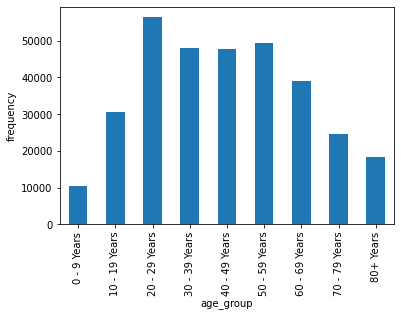

In [142]:
#Histogram
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('age_group')
plt.ylabel("frequency")
plt.show()

The distribution above looks to be a normal distribution and it is not similar to the USA population distribution by age which is clarified [here](https://en.wikipedia.org/wiki/Demographics_of_the_United_States#/media/File:USA2020dec1.png). The difference seems to be considerable especially for both the children and the old people, because the frequency of the children in our sample seems to be lower while the frequency of the old people seems to be higher. Many reasons might have caused the mentioned effect, maybe because the old people are more likely to be infected with covid-19, or because they are more likely to have serious symptoms, so they have to go to hospital which means  that their cases are more likely to be confirmed, i.e. they are more likely to appear in our sample. Also maybe there are other reasons like sampling error or sampling bias.


### 5.3- race and ethnicity (combined) Feature

The distribution of the age_group values is described in the figure below:

In [143]:
df['Race and ethnicity (combined)'].value_counts()

White, Non-Hispanic                                     180088
Hispanic/Latino                                          83114
Black, Non-Hispanic                                      37799
Asian, Non-Hispanic                                      10371
Multiple/Other, Non-Hispanic                              9131
Native Hawaiian/Other Pacific Islander, Non-Hispanic      2479
American Indian/Alaska Native, Non-Hispanic               1405
Name: Race and ethnicity (combined), dtype: int64

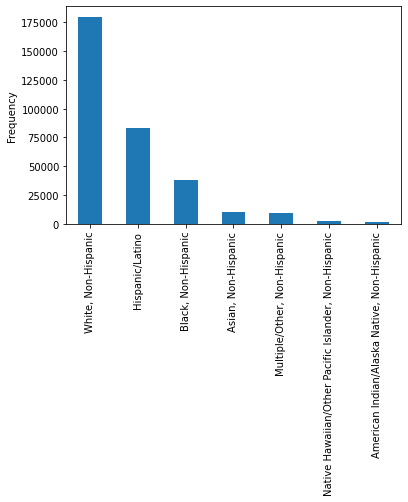

In [144]:
df['Race and ethnicity (combined)'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

Actually we don't have exact information about the distribution of the races and ethnicity in USA. but this [link](https://statisticalatlas.com/United-States/Race-and-Ethnicity) can tell us some information. From the link we can notice that the biggest three parts of the United States population are: the white people(62%), the Hispanic people (~17%) and the black people (12.6%). Let us check these percentages in our sample.

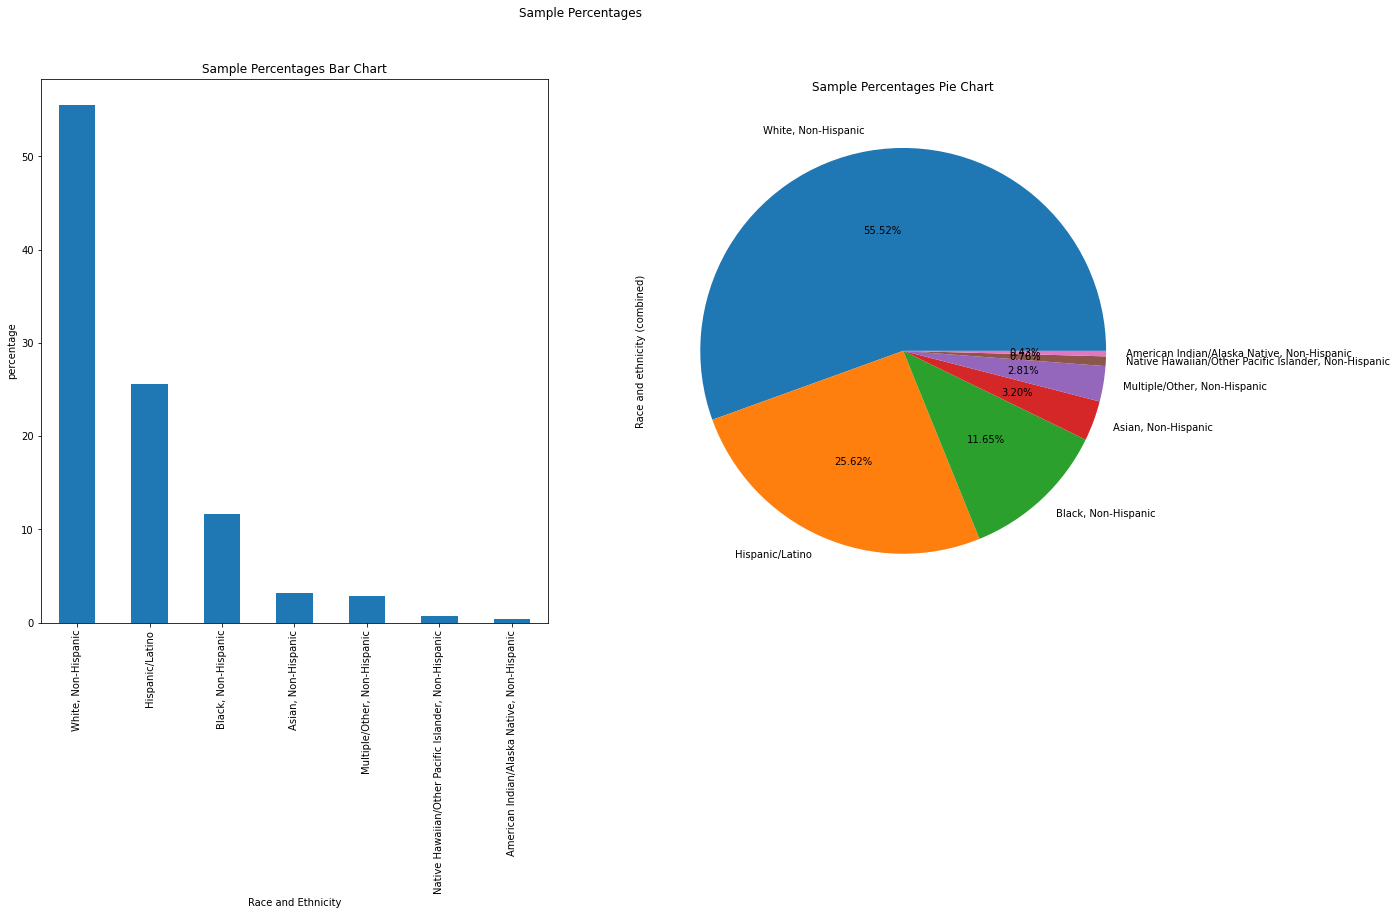

In [145]:
#Here we will show the percentage of each combination of races and ethnicities
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1, 2, 1)
(100*df['Race and ethnicity (combined)'].value_counts()/len(df['Race and ethnicity (combined)'])).plot(kind='bar')
plt.xlabel('Race and Ethnicity')
plt.ylabel('percentage')
plt.title('Sample Percentages Bar Chart')
plt.subplot(1, 2, 2)
df['Race and ethnicity (combined)'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Sample Percentages Pie Chart')
plt.suptitle('Sample Percentages')
plt.show()

It can be easily noticed that the sample contains more Hispanic/Latino people (almost 26%) than the Hispanic people in the American population, and it contains less white people (almost 56%) than the population, but it contains almost the same percentage of the black people (almost 12%).Many reasons might be responsible for the mentioned effect, for example: sampling bias, sampling error, measurement error (i.e. bad classification of the people,or for example, maybe the Hispanic/Latino category is different from the Hispanic category that mentioned [here](https://statisticalatlas.com/United-States/Race-and-Ethnicity)  ), and maybe the Hispanic/Latino people are more likely and the White Non-Hispanic people are less likely to be infected with covide-12 or get serious symptoms.

### 5.4- hosp_yn Feature 

In [146]:
df['hosp_yn'].value_counts()

No     266854
Yes     57533
Name: hosp_yn, dtype: int64

In [147]:
#Here we will show the percentages
(100*df['hosp_yn'].value_counts()/len(df['hosp_yn']))

No     82.264086
Yes    17.735914
Name: hosp_yn, dtype: float64

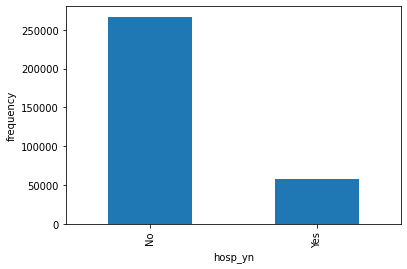

In [148]:
df['hosp_yn'].value_counts().plot(kind='bar')
plt.xlabel('hosp_yn')
plt.ylabel('frequency')
plt.show()

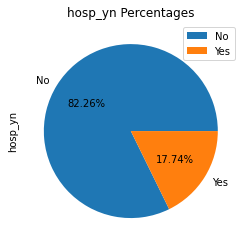

In [149]:
#Here we will show the percentages
#(100*df['hosp_yn'].value_counts()/len(df['hosp_yn'])).plot(kind='bar',title="hosp_yn Sample Percentages")
df['hosp_yn'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('hosp_yn Percentages')
plt.legend()
plt.show()

From the results above we can see that almost only about 17.7% of the patients of the sample were hospitalized.

### 5.5- icu_yn Feature 

The distribution of the values is described in the figure below:

In [150]:
df['icu_yn'].value_counts()

No     303958
Yes     20429
Name: icu_yn, dtype: int64

In [151]:
#Here we will show the percentages
(100*df['icu_yn'].value_counts()/len(df['icu_yn']))

No     93.702275
Yes     6.297725
Name: icu_yn, dtype: float64

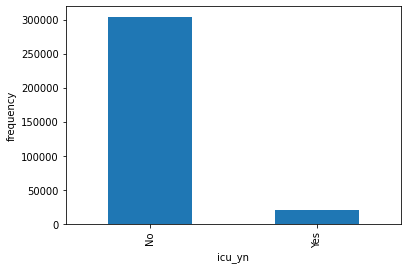

In [152]:
df['icu_yn'].value_counts().plot(kind='bar')
plt.xlabel('icu_yn')
plt.ylabel('frequency')
plt.show()

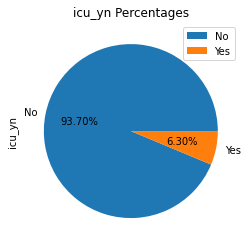

In [153]:
#Here we will plot the percentages
#(100*df['icu_yn'].value_counts()/len(df['icu_yn'])).plot(kind='bar',title="icu_yn Sample Percentages")
df['icu_yn'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('icu_yn Percentages')
plt.legend()
plt.show()

The results above show that almost about 6.3% of the sample patients were ICU admitted.

### 5.6- death_yn Feature

In [154]:
df['death_yn'].value_counts()

No     305848
Yes     18539
Name: death_yn, dtype: int64

In [155]:
#Here we will show the percentages
(100*df['death_yn'].value_counts()/len(df['death_yn']))

No     94.284913
Yes     5.715087
Name: death_yn, dtype: float64

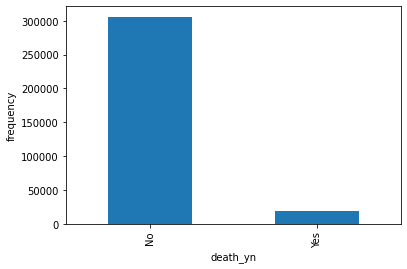

In [156]:
df['death_yn'].value_counts().plot(kind='bar')
plt.xlabel('death_yn')
plt.ylabel('frequency')
plt.show()

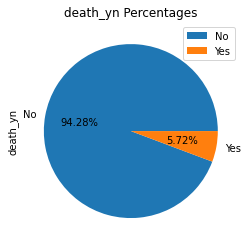

In [157]:
#Here we will plot the percentages
#(100*df['death_yn'].value_counts()/len(df['death_yn'])).plot(kind='bar',title="death_yn Sample Percentages")
df['death_yn'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('death_yn Percentages')
plt.legend()
plt.show()

The results above show that the mortality rate of the patients in our sample is 5.72%.

### 5.7- medcond_yn Feature

In [158]:
df['medcond_yn'].value_counts()

Yes    178853
No     145534
Name: medcond_yn, dtype: int64

In [159]:
#Here we will show the percentages
(100*df['medcond_yn'].value_counts()/len(df['medcond_yn']))

Yes    55.135687
No     44.864313
Name: medcond_yn, dtype: float64

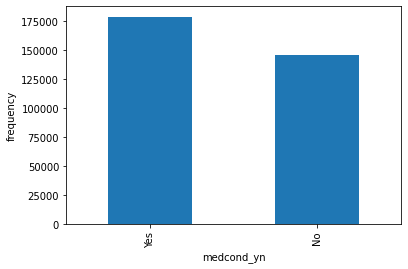

In [160]:
df['medcond_yn'].value_counts().plot(kind='bar')
plt.xlabel('medcond_yn')
plt.ylabel('frequency')
plt.show()

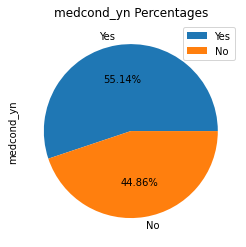

In [161]:
#Here we will plot the percentages
#(100*df['medcond_yn'].value_counts()/len(df['medcond_yn'])).plot(kind='bar',title='medcond_yn Percentages')
df['medcond_yn'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('medcond_yn Percentages')
plt.legend()
plt.show()

From the results above, we can see that a huge number of the patients in our sample have medical conditions (almost about 55%). Many reasons might have caused this effect: maybe the people who have medical conditions are more likely to be infected, or more likely to have serious symptoms (i.e. They have to go to hospital, which means that their cases are more likely to be confirmed). Or maybe because the American population contains a lot of people who have medical conditions. Or maybe the health care providers in USA make a lot of tests for the people who have medical conditions (like in nursing homes) to check if they have covid-19. Or maybe the data of the patients who have medical conditions are well recorded (i.e. without null, missing or unknown values) so their percentage increased in our sample.,  or...

## 6- Multivariate Analysis

As our goal is studying the relationships between our features and the mortality rate, in this section we will study only the relationships between death_yn and all the other features. 

In order to simplify the study, we will not study all the other features pairwise relationships.

### 6.1- sex and death_yn

To understand the relationship between the sex and the death_yn which are categorical variables, we have to check the mortality rate depending on each possible value of the sex.

P.S. mortality rate is the death rate. In other words, in a sample of patients equals to the number of deaths in the sample divide by the sample size. And this rate can be visualized using probability mass function. 

In [162]:
# Filter out the males from our original data frame
temp_female_df=df.loc[df['sex']=='Female']
temp_female_df=temp_female_df[['sex','death_yn']]

#print the propability mass function of the females death 
print("Propability of death PMF For Females:")
print((temp_female_df['death_yn'].value_counts()/len(temp_female_df['death_yn'])))
print()

# Filter out the females from our original data frame
temp_male_df=df.loc[df['sex']=='Male']
temp_male_df=temp_male_df[['sex','death_yn']]

#print the propability mass function of the males death
print("Propability of death PMF For Males:")
print((temp_male_df['death_yn'].value_counts()/len(temp_male_df['death_yn'])))

Propability of death PMF For Females:
No     0.954634
Yes    0.045366
Name: death_yn, dtype: float64

Propability of death PMF For Males:
No     0.92955
Yes    0.07045
Name: death_yn, dtype: float64


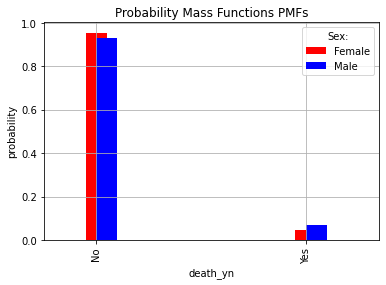

In [163]:
#plot the propability mass function of the males and females death
(temp_female_df['death_yn'].value_counts()/len(temp_female_df['death_yn'])).plot(kind='bar',align='center', width=0.1, color='red',legend='Female', label='Female')
(temp_male_df['death_yn'].value_counts()/len(temp_male_df['death_yn'])).plot(kind='bar',align='edge', width=0.1, color='blue',legend='Male',label='Male')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title = "Sex:")
plt.grid()
plt.show()

From the results above, we can see that even though that the females have appeared more in our sample, they might have a lower mortality rate.

### 6.2- age_group  and death_yn

To understand the relationship between the age_group and the death_yn which are category variables, we have to check the mortality rate depending on each possible value of the age_group.

In [164]:
# get the age group [0,9] from our original data frame
temp_zero_to_nine_df=df.loc[df['age_group']=='0 - 9 Years']
temp_zero_to_nine_df=temp_zero_to_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [0,9]  
print("Propability of death PMF For age group [0,9]:")
print((temp_zero_to_nine_df['death_yn'].value_counts()/len(temp_zero_to_nine_df['death_yn'])))
print()

# get the age group [10,19] from our original data frame
temp_ten_to_nineteen_df=df.loc[df['age_group']=='10 - 19 Years']
temp_ten_to_nineteen_df=temp_ten_to_nineteen_df[['age_group','death_yn']]
#print the death propability mass function of the age group [10,19]  
print("Propability of death PMF For age group [10,19]:")
print((temp_ten_to_nineteen_df['death_yn'].value_counts()/len(temp_ten_to_nineteen_df['death_yn'])))
print()

# get the age group [20,29] from our original data frame
temp_twenty_to_twenty_nine_df=df.loc[df['age_group']=='20 - 29 Years']
temp_twenty_to_twenty_nine_df=temp_twenty_to_twenty_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [20,29]  
print("Propability of death PMF For age group [20,29]:")
print((temp_twenty_to_twenty_nine_df['death_yn'].value_counts()/len(temp_twenty_to_twenty_nine_df['death_yn'])))
print()

# get the age group [30,39] from our original data frame
temp_thirty_to_thirty_nine_df=df.loc[df['age_group']=='30 - 39 Years']
temp_thirty_to_thirty_nine_df=temp_thirty_to_thirty_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [30,39]  
print("Propability of death PMF For age group [30,39]:")
print((temp_thirty_to_thirty_nine_df['death_yn'].value_counts()/len(temp_thirty_to_thirty_nine_df['death_yn'])))
print()

# get the age group [40,49] from our original data frame
temp_fourty_to_fourty_nine_df=df.loc[df['age_group']=='40 - 49 Years']
temp_fourty_to_fourty_nine_df=temp_fourty_to_fourty_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [40,49]  
print("Propability of death PMF For age group [40,49]:")
print((temp_fourty_to_fourty_nine_df['death_yn'].value_counts()/len(temp_fourty_to_fourty_nine_df['death_yn'])))
print()

# get the age group [50,59] from our original data frame
temp_fifty_to_fifty_nine_df=df.loc[df['age_group']=='50 - 59 Years']
temp_fifty_to_fifty_nine_df=temp_fifty_to_fifty_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [50,59]  
print("Propability of death PMF For age group [50,59]:")
print((temp_fifty_to_fifty_nine_df['death_yn'].value_counts()/len(temp_fifty_to_fifty_nine_df['death_yn'])))
print()

# get the age group [60,69] from our original data frame
temp_sixty_to_sixty_nine_df=df.loc[df['age_group']=='60 - 69 Years']
temp_sixty_to_sixty_nine_df=temp_sixty_to_sixty_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [60,69]  
print("Propability of death PMF For age group [60,69]:")
print((temp_sixty_to_sixty_nine_df['death_yn'].value_counts()/len(temp_sixty_to_sixty_nine_df['death_yn'])))
print()

# get the age group [70,79] from our original data frame
temp_seventy_to_seventy_nine_df=df.loc[df['age_group']=='70 - 79 Years']
temp_seventy_to_seventy_nine_df=temp_seventy_to_seventy_nine_df[['age_group','death_yn']]
#print the death propability mass function of the age group [70,79]  
print("Propability of death PMF For age group [70,79]:")
print((temp_seventy_to_seventy_nine_df['death_yn'].value_counts()/len(temp_seventy_to_seventy_nine_df['death_yn'])))
print()

# get the age group 80+ from our original data frame
temp_eighty_plus_df=df.loc[df['age_group']=='80+ Years']
temp_eighty_plus_df=temp_eighty_plus_df[['age_group','death_yn']]
#print the death propability mass function of the age group 80+  
print("Propability of death PMF For age group 80+:")
print((temp_eighty_plus_df['death_yn'].value_counts()/len(temp_eighty_plus_df['death_yn'])))
print()



Propability of death PMF For age group [0,9]:
No     0.998656
Yes    0.001344
Name: death_yn, dtype: float64

Propability of death PMF For age group [10,19]:
No     0.998983
Yes    0.001017
Name: death_yn, dtype: float64

Propability of death PMF For age group [20,29]:
No     0.997981
Yes    0.002019
Name: death_yn, dtype: float64

Propability of death PMF For age group [30,39]:
No     0.993295
Yes    0.006705
Name: death_yn, dtype: float64

Propability of death PMF For age group [40,49]:
No     0.983692
Yes    0.016308
Name: death_yn, dtype: float64

Propability of death PMF For age group [50,59]:
No     0.957763
Yes    0.042237
Name: death_yn, dtype: float64

Propability of death PMF For age group [60,69]:
No     0.902684
Yes    0.097316
Name: death_yn, dtype: float64

Propability of death PMF For age group [70,79]:
No     0.809666
Yes    0.190334
Name: death_yn, dtype: float64

Propability of death PMF For age group 80+:
No     0.633451
Yes    0.366549
Name: death_yn, dtype: float64

From the results above we can see that the mortality rate increses by increasing the the age. So let us draw the mortality rate (probability of death) by age group in our sample.

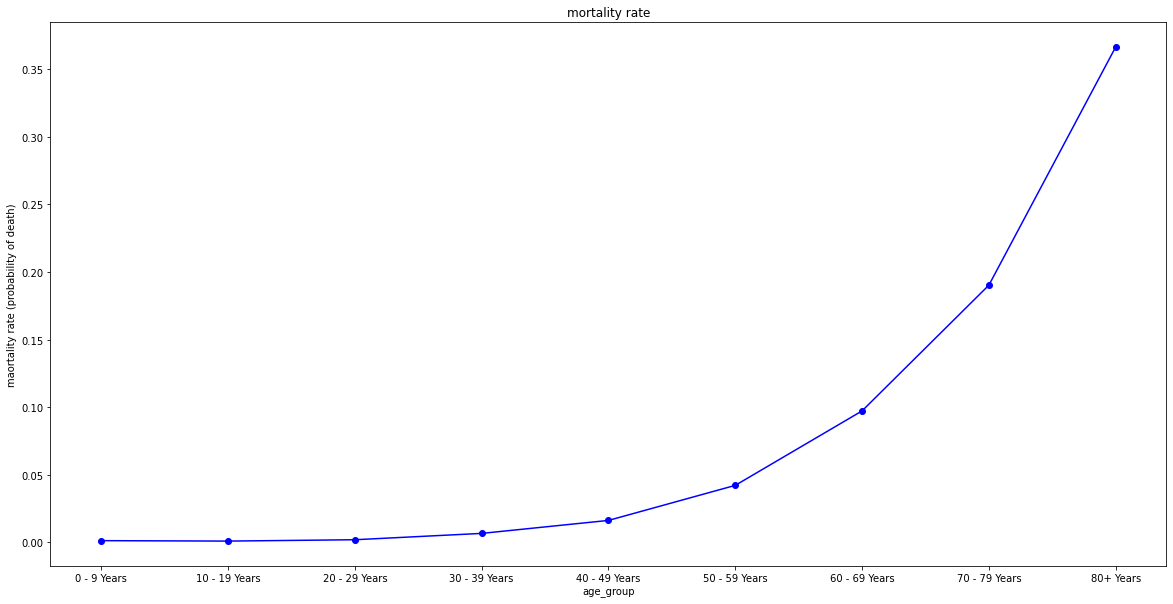

In [165]:
import numpy as np
age_groups_values_counts=df['age_group'].value_counts().sort_index()
age_groups=age_groups_values_counts.index
mortality_rate=np.ndarray(shape=(9,1), dtype=float)
mortality_rate[0]=temp_zero_to_nine_df['death_yn'].value_counts()['Yes']/len(temp_zero_to_nine_df['death_yn'])
mortality_rate[1]=temp_ten_to_nineteen_df['death_yn'].value_counts()['Yes']/len(temp_ten_to_nineteen_df['death_yn'])
mortality_rate[2]=temp_twenty_to_twenty_nine_df['death_yn'].value_counts()['Yes']/len(temp_twenty_to_twenty_nine_df['death_yn'])
mortality_rate[3]=temp_thirty_to_thirty_nine_df['death_yn'].value_counts()['Yes']/len(temp_thirty_to_thirty_nine_df['death_yn'])
mortality_rate[4]=temp_fourty_to_fourty_nine_df['death_yn'].value_counts()['Yes']/len(temp_fourty_to_fourty_nine_df['death_yn'])
mortality_rate[5]=temp_fifty_to_fifty_nine_df['death_yn'].value_counts()['Yes']/len(temp_fifty_to_fifty_nine_df['death_yn'])
mortality_rate[6]=temp_sixty_to_sixty_nine_df['death_yn'].value_counts()['Yes']/len(temp_sixty_to_sixty_nine_df['death_yn'])
mortality_rate[7]=temp_seventy_to_seventy_nine_df['death_yn'].value_counts()['Yes']/len(temp_seventy_to_seventy_nine_df['death_yn'])
mortality_rate[8]=temp_eighty_plus_df['death_yn'].value_counts()['Yes']/len(temp_eighty_plus_df['death_yn'])
plt.figure(figsize=(20,10))
plt.plot(age_groups,mortality_rate,'o-b')
plt.ylabel('maortality rate (probability of death)')
plt.xlabel('age_group')
plt.title('mortality rate')
plt.show()

From the figure above we can see that the mortality rate curve is almost flattened for the young ages, but for the older patients (starting from the '40-49 years' slice) the mortality rate increase exponentially.

### 6.3- Race and ethnicity (combined) vs death_yn

In this section we will plot the mortality rate by race and ethnicity group:

In [166]:
# get the 'White, Non-Hispanic' from our original data frame
temp_white_df=df.loc[df['Race and ethnicity (combined)']=='White, Non-Hispanic']
temp_white_df=temp_white_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'White, Non-Hispanic'
print("Propability of death PMF for 'White, Non-Hispanic':")
print((temp_white_df['death_yn'].value_counts()/len(temp_white_df['death_yn'])))
print()

# get the 'Hispanic/Latino' from our original data frame
temp_hispanic_df=df.loc[df['Race and ethnicity (combined)']=='Hispanic/Latino']
temp_hispanic_df=temp_hispanic_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'Hispanic/Latino'
print("Propability of death PMF for 'Hispanic/Latino':")
print((temp_hispanic_df['death_yn'].value_counts()/len(temp_hispanic_df['death_yn'])))
print()

# get the 'Black, Non-Hispanic' from our original data frame
temp_black_df=df.loc[df['Race and ethnicity (combined)']=='Black, Non-Hispanic']
temp_black_df=temp_black_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'Black, Non-Hispanic'
print("Propability of death PMF for 'Black, Non-Hispanic':")
print((temp_black_df['death_yn'].value_counts()/len(temp_black_df['death_yn'])))
print()

# get the 'Asian, Non-Hispanic' from our original data frame
temp_asian_df=df.loc[df['Race and ethnicity (combined)']=='Asian, Non-Hispanic']
temp_asian_df=temp_asian_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'Asian, Non-Hispanic'
print("Propability of death PMF for 'Asian, Non-Hispanic':")
print((temp_asian_df['death_yn'].value_counts()/len(temp_asian_df['death_yn'])))
print()

# get the 'Multiple/Other, Non-Hispanic' from our original data frame
temp_other_df=df.loc[df['Race and ethnicity (combined)']=='Multiple/Other, Non-Hispanic']
temp_other_df=temp_other_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'Multiple/Other, Non-Hispanic'
print("Propability of death PMF for 'Multiple/Other, Non-Hispanic':")
print((temp_other_df['death_yn'].value_counts()/len(temp_other_df['death_yn'])))
print()

# get the 'Native Hawaiian/Other Pacific Islander, Non-Hispanic' from our original data frame
temp_native_df=df.loc[df['Race and ethnicity (combined)']=='Native Hawaiian/Other Pacific Islander, Non-Hispanic']
temp_native_df=temp_native_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'
print("Propability of death PMF for 'Native Hawaiian/Other Pacific Islander, Non-Hispanic':")
print((temp_native_df['death_yn'].value_counts()/len(temp_native_df['death_yn'])))
print()

# get the 'American Indian/Alaska Native, Non-Hispanic' from our original data frame
temp_american_indian_df=df.loc[df['Race and ethnicity (combined)']=='American Indian/Alaska Native, Non-Hispanic']
temp_american_indian_df=temp_american_indian_df[['Race and ethnicity (combined)','death_yn']]
#print the death propability mass function of the 'American Indian/Alaska Native, Non-Hispanic'
print("Propability of death PMF for 'American Indian/Alaska Native, Non-Hispanic':")
print((temp_american_indian_df['death_yn'].value_counts()/len(temp_american_indian_df['death_yn'])))
print()

print(df['Race and ethnicity (combined)'].value_counts())

Propability of death PMF for 'White, Non-Hispanic':
No     0.942411
Yes    0.057589
Name: death_yn, dtype: float64

Propability of death PMF for 'Hispanic/Latino':
No     0.963857
Yes    0.036143
Name: death_yn, dtype: float64

Propability of death PMF for 'Black, Non-Hispanic':
No     0.909812
Yes    0.090188
Name: death_yn, dtype: float64

Propability of death PMF for 'Asian, Non-Hispanic':
No     0.92373
Yes    0.07627
Name: death_yn, dtype: float64

Propability of death PMF for 'Multiple/Other, Non-Hispanic':
No     0.919615
Yes    0.080385
Name: death_yn, dtype: float64

Propability of death PMF for 'Native Hawaiian/Other Pacific Islander, Non-Hispanic':
No     0.961275
Yes    0.038725
Name: death_yn, dtype: float64

Propability of death PMF for 'American Indian/Alaska Native, Non-Hispanic':
No     0.904626
Yes    0.095374
Name: death_yn, dtype: float64

White, Non-Hispanic                                     180088
Hispanic/Latino                                          83114
Bl

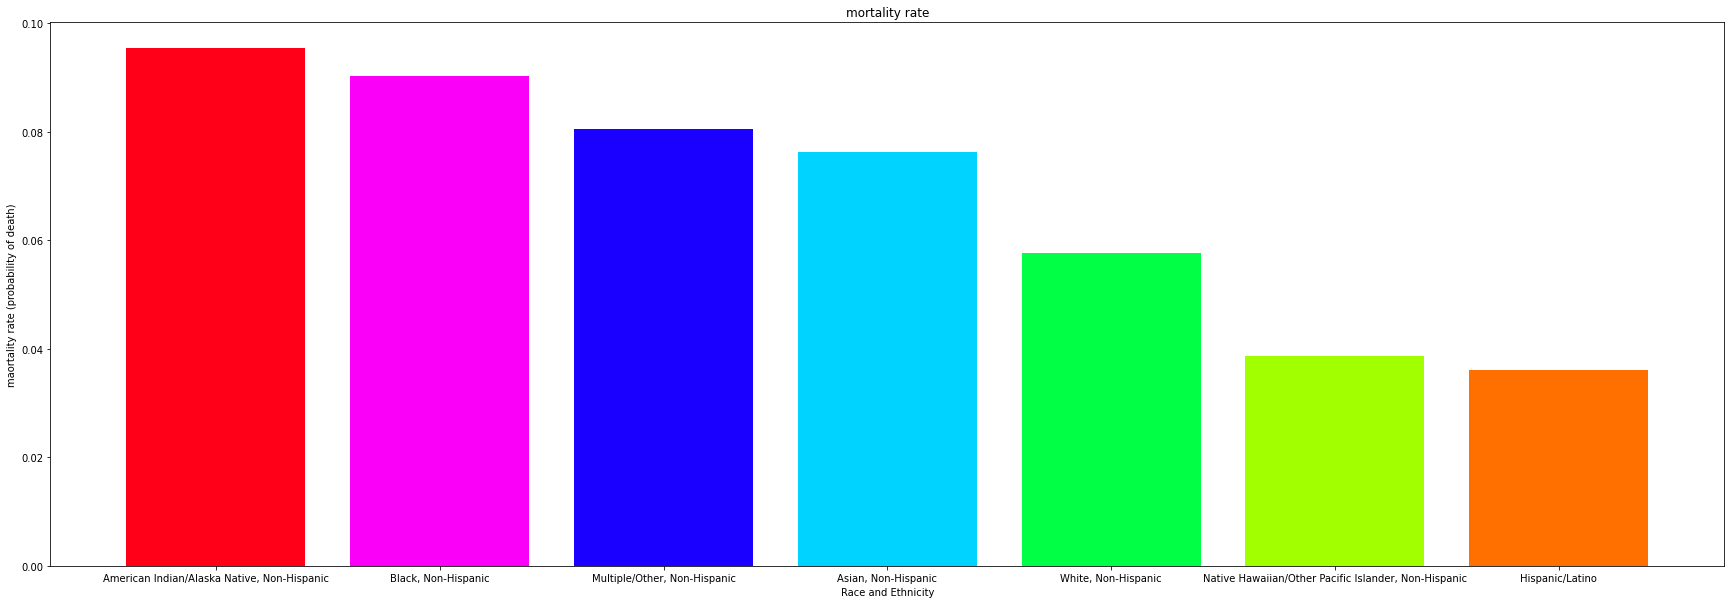

In [167]:
from matplotlib import cm
race_and_ethnicity_values_counts=df['Race and ethnicity (combined)'].value_counts()
race_and_ethnicities=race_and_ethnicity_values_counts.index
mortality_rate=np.ndarray(shape=(7), dtype=float)
mortality_rate[0]=temp_white_df['death_yn'].value_counts()['Yes']/len(temp_white_df['death_yn'])
mortality_rate[1]=temp_hispanic_df['death_yn'].value_counts()['Yes']/len(temp_hispanic_df['death_yn'])
mortality_rate[2]=temp_black_df['death_yn'].value_counts()['Yes']/len(temp_black_df['death_yn'])
mortality_rate[3]=temp_asian_df['death_yn'].value_counts()['Yes']/len(temp_asian_df['death_yn'])
mortality_rate[4]=temp_other_df['death_yn'].value_counts()['Yes']/len(temp_other_df['death_yn'])
mortality_rate[5]=temp_native_df['death_yn'].value_counts()['Yes']/len(temp_native_df['death_yn'])
mortality_rate[6]=temp_american_indian_df['death_yn'].value_counts()['Yes']/len(temp_american_indian_df['death_yn'])
temp_df=pd.DataFrame(data=[np.array(race_and_ethnicities), mortality_rate],index=['race_and_ethnicity','mortality_rate'])
temp_df=temp_df.T
temp_df=temp_df.sort_values('mortality_rate',ascending=False)
plt.figure(figsize=(30,10))
y = np.array([13, 11, 9, 7, 5, 3, 1])
colors = cm.hsv(y / float(max(y)))
plt.bar(temp_df['race_and_ethnicity'],temp_df['mortality_rate'], color = colors)
plt.ylabel('maortality rate (probability of death)')
plt.xlabel('Race and Ethnicity')
plt.title('mortality rate')
plt.show()

Apparently, the figure above tells us that the "American Indian/Alaska Native, Non-Hispanic" and the "Black Non-Hispanic" have a higher mortality rate than the others. Also it tells us that the "Hispanic/ Latino" group has the lowest mortality rate in our sample.

### 6.4- hosp_yn  and death_yn

To understand the relationship between the hosp_yn and the death_yn which are Boolean variables, we will check the mortality rate depending on the values of the hosp_yn.

In [168]:
# Filter out the non-hospitalized from our original data frame
temp_hospitalized_df=df.loc[df['hosp_yn']=='Yes']
temp_hospitalized_df=temp_hospitalized_df[['hosp_yn','death_yn']]

#print the death propability mass function of the hospitalized patients  
print("Propability of death PMF For hospitalized patient:")
print((temp_hospitalized_df['death_yn'].value_counts()/len(temp_hospitalized_df['death_yn'])))
print()

# Filter out the hospitalized from our original data frame
temp_nonhospitalized_df=df.loc[df['hosp_yn']=='No']
temp_nonhospitalized_df=temp_nonhospitalized_df[['hosp_yn','death_yn']]

#print the propability mass function of the males death
print("Propability of death PMF For non-hospitalized patient:")
print((temp_nonhospitalized_df['death_yn'].value_counts()/len(temp_nonhospitalized_df['death_yn'])))

Propability of death PMF For hospitalized patient:
No     0.721238
Yes    0.278762
Name: death_yn, dtype: float64

Propability of death PMF For non-hospitalized patient:
No     0.990628
Yes    0.009372
Name: death_yn, dtype: float64


From the results above the mortality rate of the hospitalized patients is very high ~28%, while it less than 1% for the non-hospitalized ones. This result can be clarified in the bar plot below:

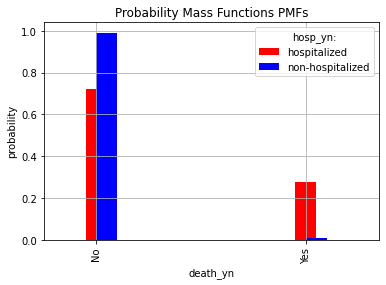

In [169]:
#plot the death propability mass function of the hospitalized and non-hospitalized patients.
(temp_hospitalized_df['death_yn'].value_counts()/len(temp_hospitalized_df['death_yn'])).plot(kind='bar',align='center', width=0.1, color='red',legend='hospitalized', label='hospitalized')
(temp_nonhospitalized_df['death_yn'].value_counts()/len(temp_nonhospitalized_df['death_yn'])).plot(kind='bar',align='edge', width=0.1, color='blue',legend='non-hospitalized',label='non-hospitalized')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title = "hosp_yn:")
plt.grid()
plt.show()

The result above tells us that the patients who don't need to be hospitalized might be less likely to die. That could be because that most the patients who die might have serious symptoms requires the hospitalization.

### 6.5- icu_yn  and death_yn

To understand the relationship between the icu_yn and the death_yn which are Boolean variables, we will check the mortality rate depending on the values of the icu_yn.

In [170]:
# Filter out the icu_yn=No from our original data frame
temp_icu_yes_df=df.loc[df['icu_yn']=='Yes']
temp_icu_yes_df=temp_icu_yes_df[['icu_yn','death_yn']]

#print the death propability mass function of the ICUed patients  
print("Propability of death PMF For hospitalized patient:")
print((temp_icu_yes_df['death_yn'].value_counts()/len(temp_icu_yes_df['death_yn'])))
print()

# Filter out the icu_yn=Yes from our original data frame
temp_icu_no_df=df.loc[df['icu_yn']=='No']
temp_icu_no_df=temp_icu_no_df[['icu_yn','death_yn']]

#print the propability mass function of the icu_yn=no death
print("Propability of death PMF For non-hospitalized patient:")
print((temp_icu_no_df['death_yn'].value_counts()/len(temp_icu_no_df['death_yn'])))

Propability of death PMF For hospitalized patient:
Yes    0.518723
No     0.481277
Name: death_yn, dtype: float64

Propability of death PMF For non-hospitalized patient:
No     0.973871
Yes    0.026129
Name: death_yn, dtype: float64


From the results above the mortality rate of the patients that have been admitted to ICU is very high ~52%, while it is less than 3% for the non-admitted ones. This result can be clarified in the bar plot below:

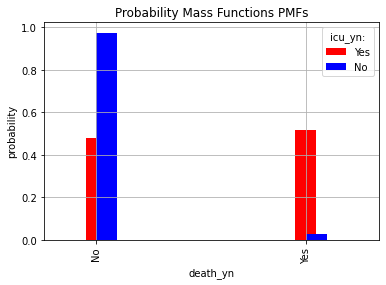

In [171]:
#plot the death propability mass function of the icu_yn=Yes and icu_yn=No patients.
(temp_icu_yes_df['death_yn'].value_counts().sort_index()/len(temp_icu_yes_df['death_yn'])).plot(kind='bar',align='center', width=0.1, color='red',legend='Yes', label='Yes')
(temp_icu_no_df['death_yn'].value_counts().sort_index()/len(temp_icu_no_df['death_yn'])).plot(kind='bar',align='edge', width=0.1, color='blue',legend='No',label='No')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title = "icu_yn:")
plt.grid()
plt.show()

### 6.6- medcond_yn and death_yn

In [172]:
# Filter out the patients who don't have medical conditions from our original data frame
temp_medcond_yes_df=df.loc[df['medcond_yn']=='Yes']
temp_medcond_yes_df=temp_medcond_yes_df[['medcond_yn','death_yn']]
#print the death propability mass function of the patients who have medical conditions.  
print("Propability of death PMF for patients who have medical conditions:")
print((temp_medcond_yes_df['death_yn'].value_counts()/len(temp_medcond_yes_df['death_yn'])))
print()

# Filter out the patients who have medical conditions from our original data frame
temp_medcond_no_df=df.loc[df['medcond_yn']=='No']
temp_medcond_no_df=temp_medcond_no_df[['icu_yn','death_yn']]

#print the death propability mass function of the patients who don't have medical conditions. 
print("Propability of death PMF for patients who don't have medical conditions:")
print((temp_medcond_no_df['death_yn'].value_counts()/len(temp_medcond_no_df['death_yn'])))

Propability of death PMF for patients who have medical conditions:
No     0.904726
Yes    0.095274
Name: death_yn, dtype: float64

Propability of death PMF for patients who don't have medical conditions:
No     0.9897
Yes    0.0103
Name: death_yn, dtype: float64


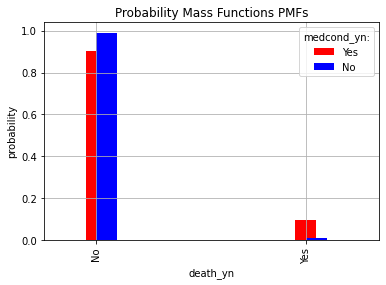

In [173]:
#plot the death propability mass function of the patients who have and who don't have medical conditions .
(temp_medcond_yes_df['death_yn'].value_counts().sort_index()/len(temp_medcond_yes_df['death_yn'])).plot(kind='bar',align='center', width=0.1, color='red',legend='Yes', label='Yes')
(temp_medcond_no_df['death_yn'].value_counts().sort_index()/len(temp_medcond_no_df['death_yn'])).plot(kind='bar',align='edge', width=0.1, color='blue',legend='No',label='No')
plt.title('Probability Mass Functions PMFs')
plt.xlabel("death_yn")
plt.ylabel("probability")
plt.legend(title = "medcond_yn:")
plt.grid()
plt.show()

The result above tells us that the patients who don't have medical conditions might be less likely to die. 

## 7- Hypothesis Testing 

In the previous section, we noticed that the mortality rate of the patients, in our sample has been affected by all the studied factors. 
In this section we will propose and test some hypotheses about the effects that mentioned above.
In other words, we will try to answer the following question: "Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?"


### 7.1- Hypothesis: patients who are older than 60 years have a higher mortality rate

- __Our Hypothesis__: covied-19 patients who are older than 60 years have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__, the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the patients who are older than 60 years in our original cleaned sample.

- __Null Hypothesis__: patients who are older than 60 years have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (100-percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the patients who are older than 60 years in our original cleaned sample, i.e. "__TSH=TS(patients who are older than 60 years in our original cleaned sample)__".

Sample Size (C): 81850
TSH: 0.18563225412339646


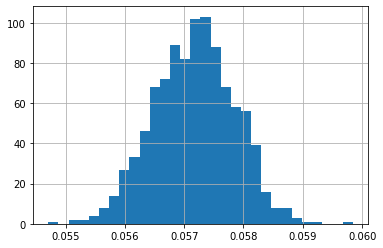

In [174]:
#calculate the sample size "C".
older_than_80_count=len(df.loc[df['age_group']=='80+ Years'])
between_70_and_79_count=len(df.loc[df['age_group']=='70 - 79 Years'])
between_60_and_69_count=len(df.loc[df['age_group']=='60 - 69 Years'])
C=older_than_80_count+between_70_and_79_count+between_60_and_69_count
print("Sample Size (C): "+ str(C))

#calculate the death count D.
older_than_80_death_count=len(df.loc[(df['age_group']=='80+ Years')&(df['death_yn']=='Yes')])
between_70_and_79_death_count=len(df.loc[(df['age_group']=='70 - 79 Years')&(df['death_yn']=='Yes')])
between_60_and_69_death_count=len(df.loc[(df['age_group']=='60 - 69 Years')&(df['death_yn']=='Yes')])
D=older_than_80_death_count+between_70_and_79_death_count+between_60_and_69_death_count

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))
for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
temp_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
temp_df['frequency'].hist(bins=30)
plt.show()

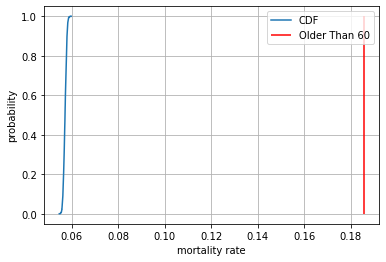

In [175]:
count, bins_count= np.histogram(temp_df['frequency'], bins=400)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of the patients that are older than 60 years
plt.vlines(x =TSH, ymin = 0, ymax = 1, color='red', label='Older Than 60')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.grid()

In [249]:
from scipy import stats
print ("\nPercetile of older than 60 patients mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(100.0-stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of the older than 60 years patients mortality rate  : ",p_value)


Percetile of older than 60 patients mortality rate  :  100.0

P-Value of the older than 60 years patients mortality rate  :  0.0


In the figure above we can see that the test statistic that corresponds to the patients who are older than 60 years in our sample (TSH) is far away from the distribution of the test statistics (TS) of the samples that have the same size. And by calculating P-Value we find that P-Value=0, which means the effect is significant and we have to accept our hypothesis.



### 7.2- Hypothesis: Males have a higher mortality rate

- __Our Hypothesis__: Male covied-19 patients have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__, the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the male patients in our original cleaned sample.

- __Null Hypothesis__: male patients have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (100-percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the male patients in our original cleaned sample, i.e. "__TSH=TS(male patients in our original cleaned sample)__".

Sample Size (C): 152477
TSH: 0.07044996950359726


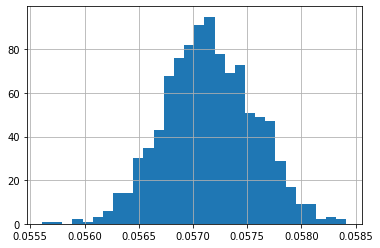

In [176]:
#calculate the sample size "C".
C=len(df.loc[df['sex']=='Male'])
print("Sample Size (C): "+ str(C))

#calculate the death count D.
D=len(df.loc[(df['sex']=='Male')&(df['death_yn']=='Yes')])

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))
for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
temp_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
temp_df['frequency'].hist(bins=30)
plt.show()

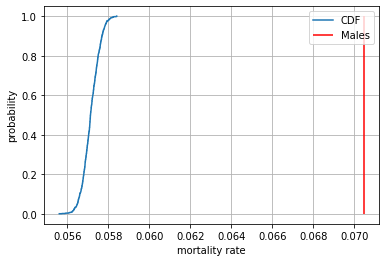

In [177]:
count, bins_count= np.histogram(temp_df['frequency'], bins=1000)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of male patients
plt.vlines(x =TSH ,ymin = 0, ymax = 1, color='red', label='Males')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.grid()

In [245]:
print ("\nPercetile of male patients mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(100.0-stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of male patients mortality rate  : ",p_value)


Percetile of male patients mortality rate  :  100.0

P-Value of male patients mortality rate  :  0.0


In the figure above we can see that the test statistic that corresponds to the Male patients in our sample (TSH) is far away from the distribution of the test statistics (TS) of the samples that have the same size. And by calculating P-Value we find that P-Value=0, which means the effect is significant and we have to accept our hypothesis.



### 7.3- Hypothesis: "Hispanic/Latino" patients have a lower mortality rate

- __Our Hypothesis__: "Hispanic/Latino" covied-19 patients have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__, the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the "Hispanic/Latino" patients in our original cleaned sample.

- __Null Hypothesis__: "Hispanic/Latino" patients have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the "Hispanic/Latino" patients in our original cleaned sample, i.e. "__TSH=TS("Hispanic/Latino" patients in our original cleaned sample)__".

Sample Size (C): 83114
TSH: 0.036143128714777296


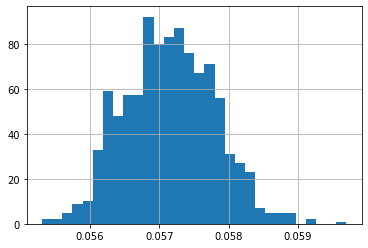

In [178]:
#calculate the sample size "C".
C=len(df.loc[df['Race and ethnicity (combined)']=='Hispanic/Latino'])
print("Sample Size (C): "+ str(C))

#calculate the death count D.
D=len(df.loc[(df['Race and ethnicity (combined)']=='Hispanic/Latino')&(df['death_yn']=='Yes')])

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))
for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
temp_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
temp_df['frequency'].hist(bins=30)
plt.show()

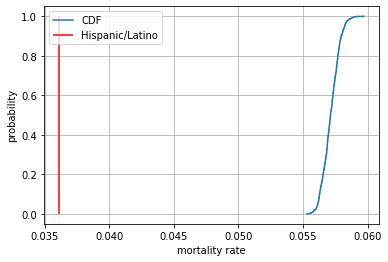

In [181]:
count, bins_count= np.histogram(temp_df['frequency'], bins=1000)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of "Hispanic/Latino" patients
plt.vlines(x =TSH ,ymin = 0, ymax = 1, color='red', label='Hispanic/Latino')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.grid()

In [242]:
print ("\nPercetile of 'Hispanic/Latino' patients mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of 'Hispanic/Latino' patients mortality rate  : ",p_value)


Percetile of 'Hispanic/Latino' patients mortality rate  :  0.0

P-Value of 'Hispanic/Latino' patients mortality rate  :  0.0


In the figure above we can see that the test statistic that corresponds to the "Hispanic/Latino" patients in our sample (TSH) is far away from the distribution of the test statistics (TS) of the samples that have the same size. And by calculating P-Value we find that P-Value=0, which means the effect is significant and we have to accept our hypothesis.

### 7.4- Hypothesis: Patients who have medical conditions have a higher mortality rate

- __Our Hypothesis__: covide-19 patients who have medical conditions have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__, the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the covide-19 patients who have medical conditions in our original cleaned sample.

- __Null Hypothesis__: covide-19 patients who have medical conditions have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (100 - percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the covide-19 patients who have medical conditions in our original cleaned sample, i.e. "__TSH=TS(the patients who have medical conditions in our original cleaned sample)__".

Sample Size (C): 178853
TSH: 0.09527377231581242


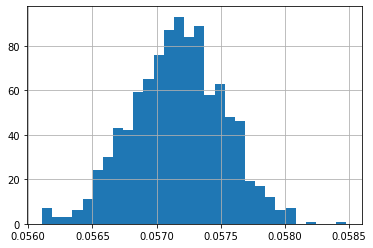

In [182]:
#calculate the sample size "C".
C=len(df.loc[df['medcond_yn']=='Yes'])
print("Sample Size (C): "+ str(C))

#calculate the death count D.
D=len(df.loc[(df['medcond_yn']=='Yes')&(df['death_yn']=='Yes')])

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))
for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
temp_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
temp_df['frequency'].hist(bins=30)
plt.show()

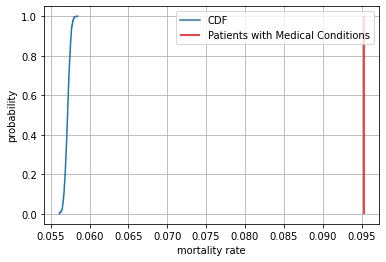

In [184]:
count, bins_count= np.histogram(temp_df['frequency'], bins=1000)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of the patients who have medical conditions
plt.vlines(x =TSH ,ymin = 0, ymax = 1, color='red', label='Patients with Medical Conditions')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.grid()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.legend()

In [239]:
print ("\nPercetile of the patients who have medical conditions mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(100-stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of the patients who have medical conditions mortality rate  : ",p_value)


Percetile of the patients who have medical conditions mortality rate  :  100.0

P-Value of the patients who have medical conditions mortality rate  :  0.0


### 7.5- Hypothesis: Hospitalized  patients have a higher mortality rate

- __Our Hypothesis__: covied-19 patients who have been hospitalized have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__ the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the patients who have been hospitalized in our original cleaned sample.

- __Null Hypothesis__: patients who have been hospitalized have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (100 - percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the patients who have been hospitalized in our original cleaned sample, i.e. "__TSH=TS(patients who have been hospitalized in our original cleaned sample)__".

Sample Size: 57533
TSH: 0.2787617541237203


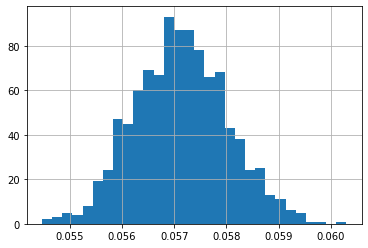

In [185]:
#calculate the needed sample size "C".
C=len(df.loc[df['hosp_yn']=='Yes'])
print("Sample Size: "+ str(C))

#calculate the death count D.
D=len(df.loc[(df['hosp_yn']=='Yes')&(df['death_yn']=='Yes')])

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))
for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
tem_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
tem_df['frequency'].hist(bins=30)
plt.show()

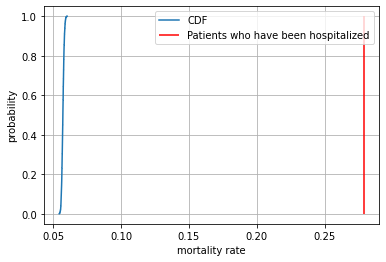

In [187]:
count, bins_count= np.histogram(tem_df['frequency'], bins=1000)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of the patients who have medical conditions
plt.vlines(x =TSH ,ymin = 0, ymax = 1, color='red', label='Patients who have been hospitalized')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.grid()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.legend()

In [230]:
print ("\nPercetile of the patients who have been hospitalized mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(100-stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of the patients who have been hospitalized mortality rate  : ",p_value)


Percetile of the patients who have been hospitalized mortality rate  :  100.0

P-Value of the patients who have been hospitalized mortality rate  :  0.0


In the figure above we can see that the test statistic that corresponds to the patients who have been hospitalized in our sample (TSH) is far away from the distribution of the test statistics (TS) of the samples that have the same size. And by calculating P-Value we find that P-Value=0, which means the effect is significant and we have to accept our hypothesis.

### 7.6- Hypothesis: Patients who have been admitted  to ICU   have a higher mortality rate.

- __Our Hypothesis__: covied-19 patients who have been admitted to ICU have a higher mortality rate than the others.

- __Test Statistic__: For a __sub-sample__ which has the size __C(sub-sample)__ and the number of dead patients __D(sub-sample)__ the test statistic of this sub-sample is: mortality rate=__TS(sub-sample)=D(sub-sample)/C(sub-sample)__. where __C(sub-sample)__ in our case is always equal to the count of the patients who have been admitted to ICU in our original cleaned sample.

- __Null Hypothesis__: patients who have been admitted to ICU have the same mortality rate of the other patients.

- __Computing P-Value__: our test is one-tailed. To compute the P-Value we will generate the distribution of our test statistic __TS__ by repeating taking a random 'sub-sample" of size __C__ from our original cleaned sample and calculate the corresponding __TS__ of this random "sub-sample".
After generating the mentioned distribution we can calculate __P-Value = (100-percentile rank(TSH))/100__, where __TSH__ is the test statistic that corresponds to the patients who have been admitted to ICU in our original cleaned sample, i.e. "__TSH=TS(patients who have been admitted to ICU in our original cleaned sample)__".

Sample Size: 20429
TSH: 0.5187233834255225


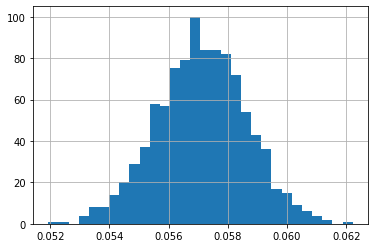

In [190]:
#calculate the needed sample size "C".
C=len(df.loc[df['icu_yn']=='Yes'])
print("Sample Size: "+ str(C))

#calculate the death count D.
D=len(df.loc[(df['icu_yn']=='Yes')&(df['death_yn']=='Yes')])

#calculate TSH 
TSH=D/C
print("TSH: " + str(TSH))

#define the array that will contains the TSs of the randomly generated sub_samples
sub_samples_TSs=np.ndarray(shape=(1000))

for i in range(1000):
    #generating a sub-sample of our sample with size c
    sub_sample =df.sample(n=C)
    #calculate TS for the sub-sample
    D_of_sub_sample=len(sub_sample.loc[(sub_sample['death_yn']=='Yes')])
    TS_of_sub_sample=D_of_sub_sample/C
    sub_samples_TSs[i]=TS_of_sub_sample
    
temp_df=pd.DataFrame(sub_samples_TSs, columns=['frequency'])
temp_df['frequency'].hist(bins=30)
plt.show()

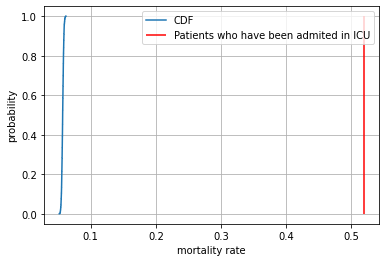

In [191]:
count, bins_count= np.histogram(temp_df['frequency'], bins=1000)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

#plot a vertical line corresponds to mortality rate of the patients who have been admited in ICU
plt.vlines(x =TSH ,ymin = 0, ymax = 1, color='red', label='Patients who have been admited in ICU')

# plotting PDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.grid()
plt.xlabel('mortality rate')
plt.ylabel('probability')
plt.legend()

In [234]:
print ("\nPercetile of the patients who have been admited in ICU mortality rate  : ", stats.percentileofscore(tem_df['frequency'], TSH))
p_value=(100-stats.percentileofscore(tem_df['frequency'], TSH))/100
print ("\nP-Value of the patients who have been admited in ICU mortality rate  : ",p_value)


Percetile of the patients who have been admited in ICU mortality rate  :  100.0

P-Value of the patients who have been admited in ICU mortality rate  :  0.0


In the figure above we can see that the test statistic that corresponds to the patients who have been admitted to ICU in our sample (TSH) is far away from the distribution of the test statistics (TS) of the samples that have the same size. And by calculating P-Value we find that P-Value=0, which means the effect is significant and we have to accept our hypothesis.



Finally, we have to mention that, in all the six hypothesis tests above, in order to calculate the P-Value, we have generated the distribution of the test statistic TS. 
But it was possible to get rid of this generation process of the distribution, by depending on the central limit theorem. i.e. our test statistic TS in all the six hypothesis represents the mortality rate in the test sample which is actually the mean of the binomial variable death_yn (if we considered this variable a binomial one with 0 and 1 values).
Accordingly, TS is normally distributed with a mean equals to the mean of our final cleaned sample and a standard deviation equals to the standard deviation of our final cleaned sample divided by the squared root of the test sample size.


## 8- Limitations

The limitations of our study are:
1. The first limitation: there are a lot of covid-19 patients who don't have symptoms, which means that they are less likely to appear in our original CDC data and their cases are less likely to be confirmed. And this is a big issue, because it can cause a considerable sampling bias. For example, it might cause increasing the mortality rate in the sample. In addition to this issue there are other limitation of our original CDC data as mentioned on CDC [website](https://www.cdc.gov/coronavirus/2019-ncov/covid-data/faq-surveillance.html). 
2. The second limitation: in our study we ignored the unknown and missing value which also might bias our final cleaned sample.
3. The third limitation: despite of the fact that we have some highly correlated features (like icu_yn and hosp_yn), we didn't study the pairwise relationships between the features because this issue was not one of the goals of this study.


## 9- Conclusion and Future Work

Despite the limitations of this study, this report concludes that the mortality rate is significantly related to the age, sex, race and ethnicity, patient hospitalization and patient admission to ICU.
Our future work is studying the pairwise relationships between the features. And after that we might apply some feature engineering, for example we have to merge the hierarchically related features into one feature, i.e. hosp_yn and icu_yn must be merged in one feature. After that we think we can build a decision tree based approach to predict the death_yn of a patient depending on the resulting features. But here we have to worry about the limitations that mentioned in the previous section, so collecting another data from the population in a more random and a more accurate manner will provide us with a more accurate and a more unbiased prediction than what we expect to get by using the current CDC data.